In [ ]:
# -*- coding: utf-8 -*-
"""
'''
       COLEGIO DE POSTGRADUADOS
          CAMPUS MONTECILLO

POSGRADO EN SOCIOECONOMÍA, ESTADÍSTICA E
             INFORMÁTICA
          CÓMPUTO APLICADO

AUTOR: GIOVANNY MONTES RODRIGUEZ
COLABORADOR: DR. JUAN MANUEL GONZÁLEZ CAMACHO
"""

"\n'''\n       COLEGIO DE POSTGRADUADOS\n          CAMPUS MONTECILLO\n\nPOSGRADO EN SOCIOECONOMÍA, ESTADÍSTICA E\n             INFORMÁTICA\n          CÓMPUTO APLICADO\n\nAUTOR: GIOVANNY MONTES RODRIGUEZ\nCOLABORADOR: DR. JUAN MANUEL GONZÁLEZ CAMACHO\n"

In [ ]:
"""
El presente documento contiene todas las etapas para la implementacion de redes neuronales convolucionales CNN Estandar, CNN-VGG16 y CNN-MobileNetV2
"""

'\nEl presente documento contiene todas las etapas para la implementacion de redes neuronales convolucionales CNN Estandar, CNN-VGG16 y CNN-MobileNetV2\n'

In [ ]:
#DESCARGA DE IMAGENES

"""
Descargaremos el dataset y utilizaremos solo las carpetas TRAIN,TEST y VALIDATION(las otras carpetas tiene imagenes repetidas)
Cada imágen será introducida en una nueva carpeta del mismo nombre, mientras las otras clases serán ignoradas.
Afzaal, U.; Bhattarai, B.; Pandeya, Y.R.; Lee, J. An Instance Segmentation Model for Strawberry Diseases Based on Mask R-CNN. Sensors 2021, 21, 6565.
URL:https://www.kaggle.com/datasets/usmanafzaal/strawberry-disease-detection-dataset?resource=download

TOTAL DE IMÁGENES POR CARPETA:
angular_leafspot:435
leaf_spot:615
mildew _leaf:533

Descargaremos el dataset de  Plantvillage para la clase hojas de fresa sana:
Hughes, D. P., & Salathé, M. (2015). An open access repository of images on plant health to enable the development of mobile disease diagnostics. ArXiv. doi: 10.48550/arXiv.1511.08060
URL:https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset

TOTAL DE IMÁGENES POR CARPETA:
healthy_leaf:450

Tendremos 4 carpetas con el nombre de las clases y dentro las imágenes correspondientes
CARPETA BASE/
----------->/angular_leafspot/
----------->/leaf_spot/
----------->/mildew _leaf/
----------->/hojas_sanas/
"""

In [ ]:
#librerias que usaremos:
import os, shutil, cv2, numpy as np, tensorflow as tf, keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, utils
from tensorflow.keras.utils import image_dataset_from_directory
from keras import Input, optimizers, activations
from google.colab import drive, auth
import seaborn as sns, matplotlib.pyplot as plt, statistics
import time as g
from keras.applications import vgg16 as vgg

In [ ]:
"""AUÍ DEFINIMOS EL TAMAÑO DE IMÁGEN CON EL QUE TRABAJAREMOS"""
dst_size = (224, 224) #Tamaño estandar de entrada para MoibleNetV2: 224 x 224 PIXELES

In [ ]:
# Directorio de origen de las imágenes
src_directory = r"/content/drive/MyDrive/CARPETA BASE"

# Directorio de destino
dst_directory =r"/content/drive/MyDrive/CARPETA BASE/TAM224x224"

In [ ]:
#EL PROPOSITO DE ESTE BLOQUE ES TOMAR TODOS LOS ARCHIVOS Y RENOMBRARLOS CON TERMINACIÓN JPG
#ADEMAS DE TENERLOS ORDENADOS, EN EL PASO SIGUIENTE SERAN GUARDADOS EN EL MISMO FORMATO
def renombrar(ruta, nombre):
    contador = 1
    lista = os.listdir(ruta)
    for i in lista:
        if i.endswith('.jpg') or i.endswith('.jpeg') or i.endswith('.png'):  # Verifica que el archivo tenga extensión .jpg
            nuevo_nombre = os.path.join(ruta, "{}{}.jpg".format(nombre, contador))
            while os.path.exists(nuevo_nombre):
                contador += 1
                nuevo_nombre = os.path.join(ruta, "{}{}.jpg".format(nombre, contador))
            os.rename(os.path.join(ruta, i), nuevo_nombre)
            contador += 1
    return "Archivos renombrados: {}".format(nombre)

carpeta_base = src_directory #Qué carpeta analizaremos?
nombres_carpetas = os.listdir(carpeta_base)

for s in nombres_carpetas:
    ruta_carpeta = os.path.join(carpeta_base, s)
    if os.path.isdir(ruta_carpeta):
        print(renombrar(ruta_carpeta, s))

Archivos renombrados: hojas_sanas
Archivos renombrados: angular_leafspot
Archivos renombrados: leaf_spot
Archivos renombrados: powdery_mildew


REDIMENSIONAR TODAS LAS IMÁGENES A 224X224

In [ ]:
#creamos las mismas carpetas en el destino
lista_carpetas_destino=[]
subcarpetas_carpeta_original= os.listdir(src_directory)
if not os.path.exists(dst_directory):
    os.makedirs(dst_directory)

for carpetas in subcarpetas_carpeta_original:
    nueva_carpeta=os.path.join(dst_directory,carpetas)
    if not os.path.exists(nueva_carpeta):
        os.makedirs(nueva_carpeta)
    lista_carpetas_destino.append(nueva_carpeta)


# Recorremos las imágenes en el directorio
for carpetas_origen in subcarpetas_carpeta_original:#tengo los nombres de carpetas
    ruta=os.path.join(src_directory,carpetas_origen)
    for filename in os.listdir(ruta):# por cada archivo dentro de la carpeta#nombres_archivo_por_carpeta
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            # Leemos la imagen

            src = cv2.imread(os.path.join(ruta, filename))

            # Redimensionamos la imagen
            dst = cv2.resize(src, dst_size)

            # Construimos el nombre de archivo de destino
            dst_filename1 = os.path.join(dst_directory, carpetas_origen)
            dst_filename2 = os.path.join(dst_filename1, filename)
            # Guardamos la imagen redimensionada
            cv2.imwrite(dst_filename2, dst)

In [ ]:
#FUNCION PARA EXPLORAR LAS CARPETAS Y CONTAR LOS ARCHIVOS POR CARPETA
indent_level = 0
def count_files_in_directory(path):
    count = 0
    for dirpath, dirnames, filenames in os.walk(path):
        count += len(filenames)
    return count


def print_directory_tree(path):
    global indent_level
    dirnames = [child for child in os.listdir(path) if os.path.isdir(os.path.join(path, child))]
    for child in os.listdir(path):
        child_path = os.path.join(path, child)
        if os.path.isdir(child_path):
            print(" " * indent_level + child + "/")
            indent_level += 4
            print_directory_tree(child_path)
            indent_level -= 4

    if not dirnames:
        print(" " * indent_level + "Numero de Archivos:{}".format(count_files_in_directory(path)))

In [ ]:
print("Árbol de directorios:")
print_directory_tree(dst_directory)

Árbol de directorios:
hojas_sanas/
    Numero de Archivos:874
angular_leafspot/
    Numero de Archivos:541
leaf_spot/
    Numero de Archivos:650
powdery_mildew/
    Numero de Archivos:558


In [ ]:
#FUNCION PARA COPIAR LOS ARCHIVOS A SU RESPECTIVA CARPETA MANTENIENDO UNA DISTRIBUCIÓN EQUITATIVA ENTRE TRAIN, VALIDATION Y TEST
"""Comienza bloque de creación de carpetas"""
#Creamos las 3 carpetas principales: TRAIN VALIDATION Y TEST

particion=0.8 #80% de los datos para TRAIN
division=["TRAIN","TEST","VALIDATION"]


base_dir=r"/content/drive/MyDrive/CARPETA BASE/PRUEBA"
if not os.path.exists(base_dir):
  os.mkdir(base_dir)
src_directory="/content/drive/MyDrive/CARPETA BASE/TAM224x224"
nombres_carpetas=os.listdir(src_directory)

lista_elementos=np.arange(4, dtype=object)#AREMOS UNA LISTA DE LISTAS CON RUTAS DE LOS ARCHIVOS


for i in division:
  b=0
  dir = os.path.join(base_dir, i)
  os.mkdir(dir)
  for j in nombres_carpetas:
    dir_class=os.path.join(dir,j)
    os.mkdir(dir_class)#hasta aqui he creado la carpeta de la clase dentro de "TRAIN"

    if i=="TRAIN":
      origin=os.path.join(src_directory,j)
      lista_elementos[b]=os.listdir(origin)#obteniendo la lista de elementos por carpeta desde TAM224x224
      fnames = np.random.choice(lista_elementos[b], replace=False, size=round(len(lista_elementos[b])*particion))#copiaremos el 80% de las imágenes de cada carpeta y las meteremos a su destino
      for fname in fnames:
          src = os.path.join(origin, fname)
          dst = os.path.join(dir_class, fname)
          shutil.copyfile(src, dst)
      #acabando de copiar los archivos, quitaremos de la lista los que ya usamos y los restantes serán distribuidos en las carpetas restantes
      lista_elementos[b] = np.setdiff1d(lista_elementos[b], fnames)

    if i=="TEST":
      #fnames contiene 10% de las imágenes  de forma aleatoria obtenidas en el paso anterior
      origin=os.path.join(src_directory,j)
      fnames = np.random.choice(lista_elementos[b], replace=False, size=round(len(lista_elementos[b])*.5))
      for fname in fnames:
          src = os.path.join(origin, fname)
          dst = os.path.join(dir_class, fname)
          shutil.copyfile(src, dst)
      #acabando de copiar los archivos, quitaremos de la lista los que ya usamos y los restantes serán distribuidos en las carpetas restantes
      lista_elementos[b] = np.setdiff1d(lista_elementos[b], fnames)

    if i=="VALIDATION":
      origin=os.path.join(src_directory,j)
      #fnames contiene 10% de las imágenes  de forma aleatoria obtenidas en el paso anterior
      fnames = lista_elementos[b]
      for fname in fnames:
          src = os.path.join(origin, fname)
          dst = os.path.join(dir_class, fname)
          shutil.copyfile(src, dst)

    b+=1

In [ ]:
#CONTAMOS LOS ARCHIVOS EN EL DIRECTORIO DE DESTINO PARA VERIFICAR QUE ESTÉ CORRECTO
print_directory_tree(base_dir)

TRAIN/
    hojas_sanas/
        Numero de Archivos:699
    angular_leafspot/
        Numero de Archivos:433
    leaf_spot/
        Numero de Archivos:520
    powdery_mildew/
        Numero de Archivos:446
TEST/
    hojas_sanas/
        Numero de Archivos:88
    angular_leafspot/
        Numero de Archivos:54
    leaf_spot/
        Numero de Archivos:65
    powdery_mildew/
        Numero de Archivos:56
VALIDATION/
    hojas_sanas/
        Numero de Archivos:87
    angular_leafspot/
        Numero de Archivos:54
    leaf_spot/
        Numero de Archivos:65
    powdery_mildew/
        Numero de Archivos:56


AUMENTANDO LA BASE DE DATOS

In [ ]:
"""Aumentaremos 4 veces la base de entrenamiento mediante trasformaciones"""

#la carpeta donde están las carpetas del proceso anterior están en base_dir
train_dir = base_dir+'/TRAIN'

"""Definimos las transformaciones que llevaremos a cabo"""
datagen = ImageDataGenerator(
    rescale=1./255,           #transformacion de escala
    rotation_range=25,        #Angulo de rotación
    width_shift_range=0.2,    #Traslación Orizontal
    height_shift_range=0.2,   #Traslación Vertical
    shear_range=0.2,          #Distorción
    zoom_range=0.2,           #Zoom o acercamiento
    horizontal_flip=True,     #Volteado Horizontal
    brightness_range=(0.5,2), #Rango de brillo; 1=sin_cambio, 1.5=brilloso, 0.5=Obscuro
    vertical_flip=True)       #Volteado Vertical

# Crear un generador de datos para cada subcarpeta
for subdir in os.listdir(train_dir):
    subdir_path = os.path.join(train_dir, subdir)
    if os.path.isdir(subdir_path):
        generator = datagen.flow_from_directory(
            train_dir,
            target_size=dst_size,
            color_mode="rgb",
            #Si la clases no están balanceadas lo dejamos así. y si están balanceadas podemos cambiarlo por: rango_train
            batch_size=len(os.listdir(subdir_path)),
            save_to_dir=subdir_path,
            save_prefix='aumentado',
            classes=[subdir],
            class_mode="categorical",
            save_format="jpg",)
            #si tomamos el número total de imágenes y la procesamos 4 veces , es decir habremos generado 4 transformaciones por cada imagen
        for i in range(4):
            generator.next()


Found 699 images belonging to 1 classes.
Found 433 images belonging to 1 classes.
Found 520 images belonging to 1 classes.
Found 446 images belonging to 1 classes.


In [ ]:
print("Imágenes de TRAIN despues del aumento:")
print_directory_tree(train_dir)

Imágenes de TRAIN despues del aumento:
hojas_sanas/
    Numero de Archivos:3495
angular_leafspot/
    Numero de Archivos:2165
leaf_spot/
    Numero de Archivos:2600
powdery_mildew/
    Numero de Archivos:2230


#COMIENZA LA ETAPA DE ENTRENAMIENTO DE LOS MODELOS


In [ ]:
""" SÍ TODO LO ANTERIOR SE EJECUTÓ CORRECTAMENTE PUEDE SEGUIR DESDE AQUÍ"""

In [ ]:
#Cargaremos los directorios que utilizaremos en el proceso:
original_dataset_dir="/content/drive/MyDrive/CARPETA BASE"#todos los archivos para el experimento estarán dentro de esta carpeta
base_dir=original_dataset_dir+"/PRUEBA"
train_dir = base_dir+'/TRAIN'
validation_dir = base_dir+'/VALIDATION'
test_dir = base_dir+'/TEST'

#Carga de funciones para obtener métricas

In [ ]:
#Función para graficar la curva de aprendizaje
def graficar_curva_aprendizaje(history=None,plt=plt):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)
    plt.plot(epochs, accuracy, "bo", label="Precisión en Entrenamiento")
    plt.plot(epochs, val_accuracy, "b", label="Precisión en Validación")
    plt.title("Precisión en Entrenamiento y Validación")
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, "bo", label="Pérdida en Entrenamiento")
    plt.plot(epochs, val_loss, "b", label="Pérdida en Validación")
    plt.title("Pérdida en Entrenamiento y Validación")
    plt.legend()
    plt.show()

In [ ]:
#función para obtener las etiquetas del dataset y del modelo
def get_actual_predicted_labels(dataset=None,model=None):

  actual = [labels for _, labels in dataset.unbatch()]
  actual = tf.argmax(actual, axis=1)

  predicted = model.predict(dataset)
  predicted = tf.argmax(predicted, axis=1)

  return actual, predicted

In [ ]:
#función para graficar la matriz de confusión
def graficar_matriz_confusion(actual, predicted, labels):
    cm = tf.math.confusion_matrix(actual, predicted)
    cm_normalized = cm / np.sum(cm, axis=1, keepdims=True) # Normalizar la matriz de confusión
    ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f')
    sns.set(rc={'figure.figsize': (9, 11)})
    sns.set(font_scale=1.4)
    ax.set_title('')
    ax.set_xlabel('Predicho')
    ax.set_ylabel('Observado')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    ax.xaxis.set_ticklabels(["A","B","C","D"])
    #ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(["A","B","C","D"])
    #ax.yaxis.set_ticklabels(labels)

In [ ]:
#función para calcula la precisión y la sensibilidad del modelo
def calcular_precision_recall(y_actual, y_pred, labels):
  """
    Calcula la precision y recall de un modelo de clasificación usando the los valores observados y los predichos.

    Args:
      y_actual: valores observados.
      y_pred: valores predichos.
      labels: lista de etiquedas.

    Return:
      Precisión y recall.
  """
  cm = tf.math.confusion_matrix(y_actual,y_pred)
  # La diagonal representa los verdaderos positivos
  tp = np.diag(cm)
  precision = dict()
  recall = dict()
  for i in range(len(labels)):
    col = cm[:, i]
    row = cm[i, :]
    # La suma de la columna menos el verdadero positivo es un falso negativo
    fp = np.sum(row) - tp[i]

        # La suma de la columna menos el verdadero positivo es un falso negativo
    fn = np.sum(col) - tp[i]

    precision[labels[i]] = tp[i] / (tp[i] + fp) # Precision

    recall[labels[i]] = tp[i] / (tp[i] + fn) # Sensibilidad (Recall)

  return  precision, recall

In [ ]:
#funcion para calcular F1 score
def calcular_f1_score(precision, recall):
  """
    Calcula la puntuación F1 del modelo utilizando los valores de precisión y sensibilidad(recall).

    Args:
      precision: diccionario que contiene valores de precisión para cada clase.
      recall: diccionario que contiene valores de recuperación para cada clase.

    Return:
      F1 score para cada clase.
  """
  f1_scores = dict()
  for label in precision.keys():
    precision_val = precision[label]
    recall_val = recall[label]
    f1_scores[label] = 2 * (precision_val * recall_val) / (precision_val + recall_val)

  return f1_scores

In [ ]:
#Definimos los directorios donde guardaremos los resultados para cada modelo:
modelos=original_dataset_dir+"/Modelos"
if not os.path.exists(modelos):
  os.makedirs(modelos)

Guardar_CNN=modelos+"/OPTIMO(CNN)"
if not os.path.exists(Guardar_CNN):
  os.makedirs(Guardar_CNN)

Guardar_CNNVGG=modelos+"/OPTIMO(CNN-VGG16)"
if not os.path.exists(Guardar_CNNVGG):
  os.makedirs(Guardar_CNNVGG)

Guardar_CNNMobilNetV2=modelos+"/OPTIMO(CNN-MobilNetV2)"
if not os.path.exists(Guardar_CNNMobilNetV2):
  os.makedirs(Guardar_CNNMobilNetV2)

#ENTRENAMIENTO DEL MODELO CNN ESTÁNDAR

In [ ]:

inicio=g.time()

In [ ]:
#MODELO CNN Estándar

def Propio(kernel=3,dropout=0.5,activacion="softmax",perdida="categorical_crossentropy",metrica="accuracy",neuronas=500,optimizador="Adamax",pix=dst_size[0]):

    inputs = Input(shape=(pix,pix,3))
    x = layers.Rescaling(1./255)(inputs)
    x= layers.Conv2D(filters=32, kernel_size=kernel, activation='relu')(x)
    x= layers.MaxPooling2D(pool_size=2)(x)
    x= layers.Conv2D(filters=64, kernel_size=kernel, activation='relu')(x)
    x= layers.MaxPooling2D(pool_size=2)(x)
    x= layers.Conv2D(filters=128, kernel_size=kernel, activation='relu')(x)
    x= layers.MaxPooling2D(pool_size=2)(x)
    x= layers.Flatten()(x)
    x= layers.Dropout(dropout)(x)
    x= layers.Dense(neuronas, activation='relu')(x)
    x= layers.Dense(neuronas, activation='relu')(x)
    x= layers.Dropout(dropout)(x)
    x= layers.Dense(4, activation='softmax')(x)
    outputs = layers.Dense(4, activation=activacion)(x)

    model = models.Model(inputs, outputs)
    model.compile(loss=perdida,
                  optimizer=optimizador,
                  metrics=[metrica])

    return model

In [ ]:
#Revisamos brevemente como se compone la red
revision_modelo=Propio()
revision_modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                         

In [ ]:
#Funciones de carga de imágenes
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=dst_size,
    batch_size=50,
    seed=5,
    label_mode="categorical",
)


validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=dst_size,
    batch_size=10,
    seed=5,
    label_mode="categorical",
)


test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=dst_size,
    batch_size=10,
    label_mode="categorical",
    shuffle=False
)

Found 10490 files belonging to 4 classes.
Found 262 files belonging to 4 classes.
Found 263 files belonging to 4 classes.


In [ ]:
#FASE DE ENTRENAMIENTO DEL MODELO

callbacks = [
keras.callbacks.ModelCheckpoint(
filepath=Guardar_CNN,
save_best_only=True,
monitor='val_accuracy'),
tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=0,
    mode='auto',
    start_from_epoch=3)
]


In [ ]:
def obtener_mejores_metricas_CNN(rangos_drop, rangos_neu, rangos_opt, rangos_ker):
    mejores_metricas = np.zeros([5])

    for drop in rangos_drop:
        for neu in rangos_neu:
            for opt in rangos_opt:
                for ker in rangos_ker:
                    modelo = Propio(kernel=ker, dropout=drop, neuronas=neu, optimizador=opt)
                    history = modelo.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=callbacks)
                    accuracy = history.history["val_accuracy"][-1]

                    if accuracy >= 0.90:
                        nueva_fila = np.array([drop, neu, opt, ker, accuracy])
                        mejores_metricas = np.vstack([mejores_metricas, nueva_fila])

    return mejores_metricas

In [ ]:
mejores_metricas = obtener_mejores_metricas_CNN(rangos_drop=[0.3, 0.5, 0.7], rangos_neu=[300, 400, 600, 800], rangos_opt=["Adamax", "RMSprop", "adadelta", "adam"], rangos_ker=[2, 3])

In [ ]:
final=g.time()
print("Tiempo total de ejecución de CNN Estándar:{} Seg".format(final-inicio))
"""Tiempo de 6 horas"""

Tiempo total de ejecución de CNN Estándar:13541.54141831398 Seg


'Tiempo de 6 horas'

In [ ]:
mejores_metricas

array([['0.0', '0.0', '0.0', '0.0', '0.0'],
       ['0.3', '300', 'Adamax', '3', '0.9742646813392639'],
       ['0.3', '300', 'RMSprop', '2', '0.9375'],
       ['0.3', '400', 'Adamax', '3', '0.970588207244873'],
       ['0.3', '400', 'RMSprop', '2', '0.9338235259056091'],
       ['0.3', '600', 'RMSprop', '3', '0.9595588445663452'],
       ['0.5', '300', 'RMSprop', '2', '0.9522058963775635'],
       ['0.5', '400', 'RMSprop', '2', '0.9485294222831726'],
       ['0.5', '800', 'RMSprop', '2', '0.9264705777168274'],
       ['0.7', '300', 'Adamax', '3', '0.9522058963775635'],
       ['0.7', '300', 'RMSprop', '2', '0.9375'],
       ['0.7', '400', 'Adamax', '2', '0.970588207244873'],
       ['0.7', '400', 'RMSprop', '2', '0.9485294222831726'],
       ['0.7', '600', 'RMSprop', '2', '0.9411764740943909'],
       ['0.7', '800', 'RMSprop', '2', '0.9375'],
       ['0.7', '800', 'RMSprop', '3', '0.9227941036224365']], dtype='<U32')

In [ ]:
#guardar los resultados al archivo de txt
file = open(Guardar_CNN+"/resultados_de_busqueda_por_rejilla.txt", "w+")
content = str(mejores_metricas)
file.write(content)
file.close()


# Obtener el índice de la fila con el máximo valor de accuracy
max_index = np.argmax(mejores_metricas[:, -1])

# Obtener los parámetros correspondientes a la fila con el máximo valor de accuracy
kernel_max = int(mejores_metricas[max_index, 3])
dropout_max = float(mejores_metricas[max_index, 0])
neuronas_max = int(mejores_metricas[max_index, 1])
optimizador_max = str(mejores_metricas[max_index, 2])

# Recuperamos un modelo CNN estandar con la función Propio() con los parámetros correspondientes al máximo valor de accuracy
modelo_CNN = Propio(kernel=kernel_max, dropout=dropout_max, neuronas=neuronas_max, optimizador=optimizador_max)


In [ ]:
#Entrenamos nuevamente el modelo para obtener las metricas
"""CUANDO EXISTÁN DOS MODELOS ÓPTIMOS CON MISMO ACC: Antes de ejecutar el siguiente código verifique que la carpeta de guardado(Guardar_CNN) esté vacía de lo contrario el modelo
y los resultados se mostrarán en funcion del último modelo guardado en lugar del siguiente.
"""
history = modelo_CNN.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/100
126/126 [==============================] - 12s 78ms/step - loss: 1.2059 - accuracy: 0.5503 - val_loss: 1.1133 - val_accuracy: 0.6581
Epoch 2/100
126/126 [==============================] - 10s 77ms/step - loss: 1.0590 - accuracy: 0.6948 - val_loss: 0.9970 - val_accuracy: 0.7316
Epoch 3/100
126/126 [==============================] - 10s 77ms/step - loss: 0.9499 - accuracy: 0.8932 - val_loss: 0.9084 - val_accuracy: 0.9228
Epoch 4/100
126/126 [==============================] - 10s 77ms/step - loss: 0.8771 - accuracy: 0.9190 - val_loss: 0.8519 - val_accuracy: 0.8897
Epoch 5/100
126/126 [==============================] - 10s 77ms/step - loss: 0.8051 - accuracy: 0.9316 - val_loss: 0.7824 - val_accuracy: 0.9265
Epoch 6/100
126/126 [==============================] - 10s 77ms/step - loss: 0.7404 - accuracy: 0.9394 - val_loss: 0.7122 - val_accuracy: 0.9412
Epoch 7/100
126/126 [==============================] - 10s 77ms/step - loss: 0.6777 - accuracy: 0.9444 - val_loss: 0.6571 - val_ac

In [ ]:
#EVALUACION FINAL DEL MODELO para determinar su ACC global

test_model_cnn = keras.models.load_model(Guardar_CNN)
test_loss, test_acc = test_model_cnn.evaluate(test_dataset)
print(f"Test ACC: {test_acc:.3f}")


27/27 [==============================] - 1s 13ms/step - loss: 0.3235 - accuracy: 0.9813
Test ACC: 0.981


In [ ]:
#config = test_model_cnn.get_config()
#print(config)

In [ ]:
#RESULTADOS FINALES PARA CNN ESTÁNDAR

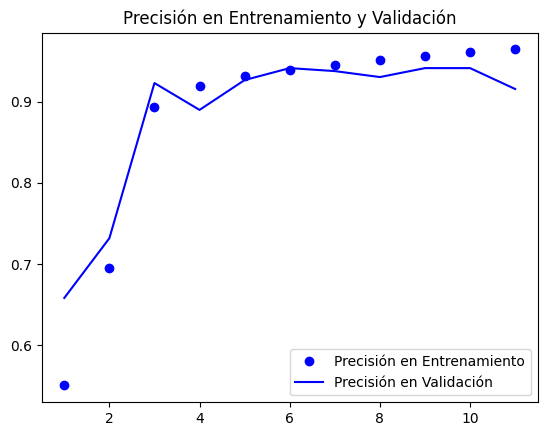

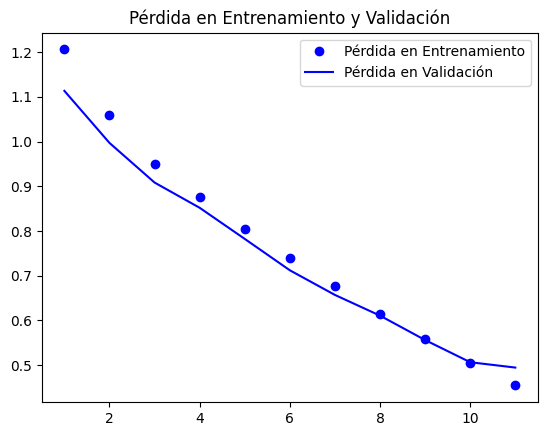

In [ ]:
graficar_curva_aprendizaje(history,plt=plt)

27/27 [==============================] - 0s 6ms/step


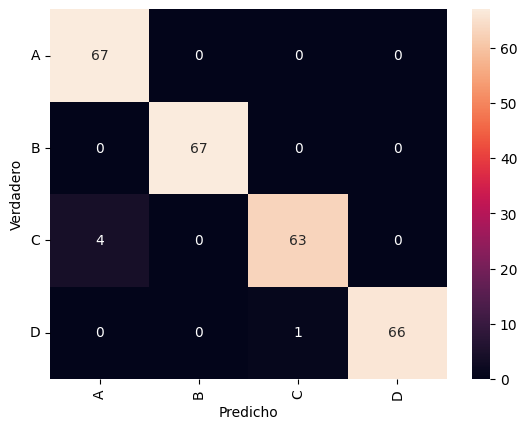

In [ ]:
actual, predicted = get_actual_predicted_labels(dataset=test_dataset,model=test_model_cnn)
graficar_matriz_confusion(actual, predicted, test_dataset.class_names)
#print(actual,predicted)

In [ ]:
precision, recall = calcular_precision_recall(actual, predicted, test_dataset.class_names)
resultadosf1=calcular_f1_score(precision, recall)
print("Resultado Precisión: {}".format(precision))
print("Resultado Recall: {}".format( recall))
print("Resultado F1_Score: {}".format(resultadosf1))

In [ ]:
valores = list(resultadosf1.values())
promedio = statistics.mean(valores)
print("F1macro:", promedio)

#ENTRENAMIENTO DEL MODELO CNN-VGG16

In [ ]:
inicio=g.time()

In [ ]:
#%% BASE COVOLUCIONAL VGG16

conv_base = vgg.VGG16(
weights="imagenet",
include_top=False,
input_shape=(dst_size[0],dst_size[0],3))
##bloquear capas de 1-4
for layer in conv_base.layers:
  if layer.name.startswith("block") and not layer.name.startswith("block5"):
    layer.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
#verificar si las capas  finalesson entrenables
for layer in conv_base.layers:
  if isinstance(layer, keras.layers.Conv2D):
    print(layer.name, layer.trainable)

block1_conv1 False
block1_conv2 False
block2_conv1 False
block2_conv2 False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block5_conv1 True
block5_conv2 True
block5_conv3 True


In [ ]:

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=dst_size,
    batch_size=50,
    seed=5,
    label_mode="categorical",
)


validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=dst_size,
    batch_size=10,
    seed=5,
    label_mode="categorical",
)


test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=dst_size,
    batch_size=10,
    label_mode="categorical",
    shuffle=False
)

Found 6300 files belonging to 4 classes.
Found 272 files belonging to 4 classes.
Found 268 files belonging to 4 classes.


In [ ]:
# #MODELO DE LA RED CON VGG16
def VGG(dropout1=0.5,dropout2=0.6,activacion="softmax",perdida="categorical_crossentropy",metrica="accuracy",neuronas=256,optimizador="Adamax",vgg=conv_base,preproces=vgg):

  inputs = Input(shape=(dst_size[0], dst_size[0], 3))
  x = preproces.preprocess_input(inputs)
  x = vgg(x)
  x = layers.Flatten()(x)
  x = layers.Dropout(dropout1)(x)
  x = layers.Dense(neuronas,activation='relu')(x)
  x = layers.Dense(neuronas,activation='relu')(x)
  x = layers.Dropout(dropout2)(x)
  outputs = layers.Dense(4, activation=activacion)(x)

  model = models.Model(inputs, outputs)
  model.compile(loss=perdida,
                optimizer=optimizador,
                metrics=[metrica])
  return model

In [ ]:
#FASE DE ENTRENAMIENTO DEL MODELO

callbacks2 = [
keras.callbacks.ModelCheckpoint(
filepath=Guardar_CNNVGG,
save_best_only=True,
monitor='val_accuracy'),
tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=0,
    mode='auto',
    start_from_epoch=5)
]

In [ ]:
#ÁSTA FUNCION TAMBIEN LA USAMOS EN VGG16 y MOBILENETV2
def obtener_mejores_metricas(rangos_drop, rangos_neu, rangos_opt,callbacks=callbacks2,mod=None):
    mejores_metricas = np.zeros([4])

    for drop in rangos_drop:
        for neu in rangos_neu:
            for opt in rangos_opt:
              modelo=mod(dropout1=drop,dropout2=drop+0.1,neuronas=neu,optimizador=opt)
              history = modelo.fit(
                    train_dataset,
                    epochs=100,
                    validation_data=validation_dataset
                    ,callbacks=callbacks2
                    )
              accuracy = history.history["val_accuracy"][-1]

              if accuracy >= 0.95:
                  nueva_fila = np.array([drop, neu, opt, accuracy])
                  mejores_metricas = np.vstack([mejores_metricas, nueva_fila])

    return mejores_metricas

In [ ]:
mejores_metricas = obtener_mejores_metricas(rangos_drop=[0.3,0.4,0.5,0.6,0.7], rangos_neu=[300,400,600], rangos_opt=["Adamax","RMSprop","adadelta"],,callbacks=callbacks2,mod=VGG)

Epoch 1/100
126/126 [==============================] - ETA: 0s - loss: 1.2342 - accuracy: 0.4621

126/126 [==============================] - 49s 310ms/step - loss: 1.2342 - accuracy: 0.4621 - val_loss: 0.9631 - val_accuracy: 0.5110
Epoch 2/100
126/126 [==============================] - 33s 258ms/step - loss: 0.9430 - accuracy: 0.5048 - val_loss: 0.9069 - val_accuracy: 0.4926
Epoch 3/100
126/126 [==============================] - 33s 258ms/step - loss: 0.9069 - accuracy: 0.4997 - val_loss: 0.8611 - val_accuracy: 0.5037
Epoch 4/100
126/126 [==============================] - ETA: 0s - loss: 0.8515 - accuracy: 0.5127

126/126 [==============================] - 36s 287ms/step - loss: 0.8515 - accuracy: 0.5127 - val_loss: 0.7671 - val_accuracy: 0.5956
Epoch 5/100
126/126 [==============================] - 33s 259ms/step - loss: 0.8518 - accuracy: 0.5270 - val_loss: 0.8078 - val_accuracy: 0.5625
Epoch 6/100
126/126 [==============================] - ETA: 0s - loss: 0.7598 - accuracy: 0.6010

126/126 [==============================] - 37s 291ms/step - loss: 0.7598 - accuracy: 0.6010 - val_loss: 0.5845 - val_accuracy: 0.6985
Epoch 7/100
126/126 [==============================] - 33s 258ms/step - loss: 0.5819 - accuracy: 0.6951 - val_loss: 0.5150 - val_accuracy: 0.6985
Epoch 8/100
126/126 [==============================] - ETA: 0s - loss: 0.4982 - accuracy: 0.7341

126/126 [==============================] - 36s 287ms/step - loss: 0.4982 - accuracy: 0.7341 - val_loss: 0.4083 - val_accuracy: 0.7463
Epoch 9/100
126/126 [==============================] - ETA: 0s - loss: 0.4309 - accuracy: 0.7632

126/126 [==============================] - 37s 289ms/step - loss: 0.4309 - accuracy: 0.7632 - val_loss: 0.3673 - val_accuracy: 0.8309
Epoch 10/100
126/126 [==============================] - ETA: 0s - loss: 0.3406 - accuracy: 0.8587

126/126 [==============================] - 36s 286ms/step - loss: 0.3406 - accuracy: 0.8587 - val_loss: 0.2138 - val_accuracy: 0.9449
Epoch 11/100
126/126 [==============================] - ETA: 0s - loss: 0.2037 - accuracy: 0.9452

126/126 [==============================] - 36s 285ms/step - loss: 0.2037 - accuracy: 0.9452 - val_loss: 0.0589 - val_accuracy: 0.9890
Epoch 12/100
126/126 [==============================] - ETA: 0s - loss: 0.0546 - accuracy: 0.9884

126/126 [==============================] - 37s 290ms/step - loss: 0.0546 - accuracy: 0.9884 - val_loss: 0.0233 - val_accuracy: 0.9963
Epoch 13/100
126/126 [==============================] - 33s 258ms/step - loss: 0.0303 - accuracy: 0.9935 - val_loss: 0.0384 - val_accuracy: 0.9890
Epoch 14/100
126/126 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9965

126/126 [==============================] - 36s 286ms/step - loss: 0.0153 - accuracy: 0.9965 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 15/100
126/126 [==============================] - 33s 258ms/step - loss: 0.0080 - accuracy: 0.9986 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 16/100
126/126 [==============================] - 33s 259ms/step - loss: 0.0051 - accuracy: 0.9994 - val_loss: 0.0065 - val_accuracy: 0.9963
Epoch 17/100
126/126 [==============================] - 33s 260ms/step - loss: 0.0327 - accuracy: 0.9940 - val_loss: 0.0139 - val_accuracy: 0.9926
Epoch 18/100
126/126 [==============================] - 33s 261ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.0129 - val_accuracy: 0.9926
Epoch 19/100
126/126 [==============================] - 33s 261ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0161 - val_accuracy: 0.9926
Epoch 1/100
126/126 [==============================] - 35s 261ms/step - loss: 7.8855 - accuracy: 0.3651 - val_loss: 0.9673 - val_ac

In [ ]:
mejores_metricas

array([['0.0', '0.0', '0.0', '0.0'],
       ['0.3', '300', 'Adamax', '0.9926470518112183'],
       ['0.3', '300', 'adadelta', '0.9852941036224365'],
       ['0.3', '400', 'Adamax', '1.0'],
       ['0.3', '400', 'RMSprop', '0.9522058963775635'],
       ['0.3', '400', 'adadelta', '0.9963235259056091'],
       ['0.3', '600', 'Adamax', '1.0']], dtype='<U32')

In [ ]:
final=g.time()
print(f"Tiempo total de  busqueda por rejilla VGG16: {final-inicio} Seg",)

Tiempo total de  busqueda por rejilla VGG16: 19703.78045153618 Seg


In [ ]:
#guardar los resultados al archivo de txt
file = open(Guardar_CNNVGG+"/resultados_de_busqueda_por_rejilla.txt", "w+")
content = str(mejores_metricas)
file.write(content)
file.close()

# Obtener el índice de la fila con el máximo valor de accuracy
max_index = np.argmax(mejores_metricas[:, -1])

# Obtener los parámetros correspondientes a la fila con el máximo valor de accuracy
dropout_max = float(mejores_metricas[max_index, 0])
neuronas_max = int(mejores_metricas[max_index, 1])
optimizador_max = str(mejores_metricas[max_index, 2])

# Recuperamos un modelo CNN estandar con la función VGG() con los parámetros correspondientes al máximo valor de accuracy
modelo_VGG = VGG(dropout1=dropout_max,dropout2=dropout_max+0.1,neuronas=neuronas_max,optimizador=optimizador_max)

In [ ]:
#Entrenamos nuevamente el modelo para obtener las metricas
"""CUANDO EXISTÁN DOS MODELOS ÓPTIMOS CON MISMO ACC: Antes de ejecutar el siguiente código verifique que la carpeta de guardado(Guardar_CNNVGG) esté vacía de lo contrario el modelo
y los resultados se mostrarán en funcion del último modelo guardado en lugar del siguiente.
"""
historyvgg16 = modelo_VGG.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=callbacks2)

In [ ]:
#EVALUACION FINAL DEL MODELO VGG para determinar su ACC global

test_model_vgg = keras.models.load_model(Guardar_CNNVGG)
test_loss, test_acc = test_model_vgg.evaluate(test_dataset)
print(f"Test ACC : {test_acc:.3f}")


27/27 [==============================] - 3s 109ms/step - loss: 0.0256 - accuracy: 0.9888
Test ACC : 0.989


In [ ]:
graficar_curva_aprendizaje(historyvgg16,plt=plt)
#la grafica salió rara porque no se entrenó correctamente, pero el modelo entrenado se cargó desde el archivo.

27/27 [==============================] - 2s 51ms/step


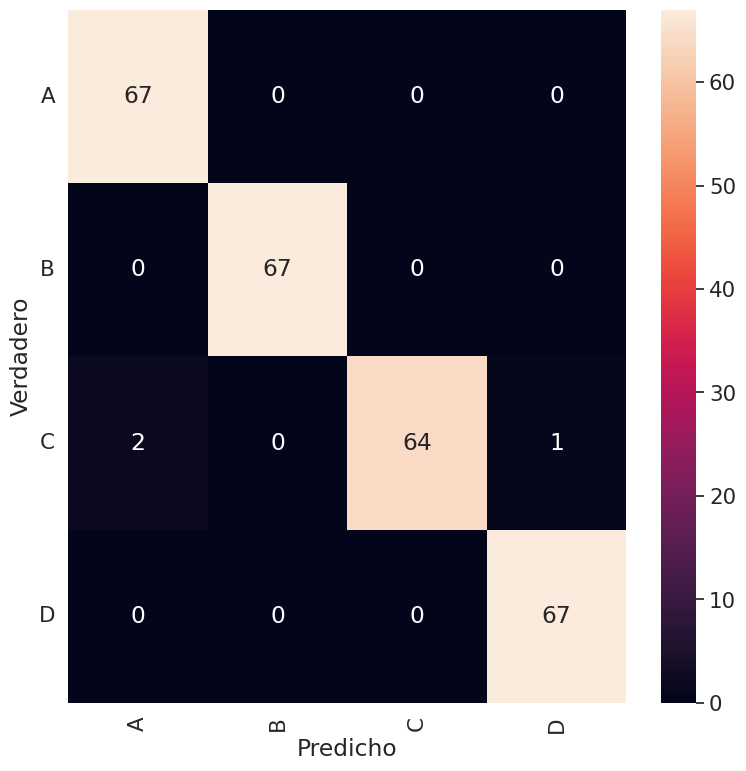

In [ ]:
actual, predicted = get_actual_predicted_labels(dataset=test_dataset,model=test_model_vgg)
graficar_matriz_confusion(actual, predicted, test_dataset.class_names)
#print(actual,predicted)

In [ ]:
precision, recall = calcular_precision_recall(actual, predicted, test_dataset.class_names)
resultadosf1=calcular_f1_score(precision, recall)
print("Resultado Precisión: {}".format(precision))
print("Resultado Recall: {}".format( recall))
print("Resultado F1_Score: {}".format(resultadosf1))

Resultado F1_Score: {'angular_leafspot': 0.9852941176470589, 'hojas_sanas': 1.0, 'leaf_spot': 0.9770992366412213, 'powdery_mildew': 0.9925925925925926}


In [ ]:
valores = list(resultadosf1.values())
promedio = statistics.mean(valores)
print("F1macro:", promedio)

Promedio: 0.9887464867202183


#ENTRENAMIENTO DEL MODELO CNN-MobileNetV2

In [ ]:
incio=g.time()

In [ ]:
#%% BASE COVOLUCIONAL MobileNet

conv_base2 = tf.keras.applications.MobileNetV2(
weights="imagenet",
include_top=False,
input_shape=(dst_size[0],dst_size[0], 3))
conv_base2.trainable=True
conv_base2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
#verificar si las capas  finalesson entrenables

for layer in conv_base2.layers:
  if isinstance(layer, keras.layers.Conv2D):
    print(layer.name, layer.trainable)

Conv1 True
expanded_conv_project True
block_1_expand True
block_1_project True
block_2_expand True
block_2_project True
block_3_expand True
block_3_project True
block_4_expand True
block_4_project True
block_5_expand True
block_5_project True
block_6_expand True
block_6_project True
block_7_expand True
block_7_project True
block_8_expand True
block_8_project True
block_9_expand True
block_9_project True
block_10_expand True
block_10_project True
block_11_expand True
block_11_project True
block_12_expand True
block_12_project True
block_13_expand True
block_13_project True
block_14_expand True
block_14_project True
block_15_expand True
block_15_project True
block_16_expand True
block_16_project True
Conv_1 True


In [ ]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=dst_size,
    batch_size=50,
    seed=5,
    label_mode="categorical",
)


validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=dst_size,
    batch_size=10,
    seed=5,
    label_mode="categorical",
)


test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=dst_size,
    batch_size=10,
    label_mode="categorical",
    shuffle=False
)

Found 6300 files belonging to 4 classes.
Found 272 files belonging to 4 classes.
Found 268 files belonging to 4 classes.


In [ ]:
#MODELO DE LA RED CON MobileNetv2
def MobileNet(dropout1=0.5,dropout2=0.6,activacion="softmax",perdida="categorical_crossentropy",metrica="accuracy",neuronas=256,optimizador="Adamax",mobile=conv_base2):

  inputs = Input(shape=(dst_size[0], dst_size[0], 3))
  x = mobile(inputs)
  x = layers.Flatten()(x)
  x = layers.Dropout(dropout1)(x)
  x = layers.Dense(neuronas,activation='relu')(x)
  x = layers.Dense(neuronas,activation='relu')(x)
  x = layers.Dropout(dropout2)(x)
  outputs = layers.Dense(4, activation=activacion)(x)

  model = models.Model(inputs, outputs)
  model.compile(loss=perdida,
                optimizer=optimizador,
                metrics=[metrica])
  return model

In [ ]:
#FASE DE ENTRENAMIENTO DEL MODELO

callbacks3 = [
keras.callbacks.ModelCheckpoint(
filepath=Guardar_CNNMobilNetV2,
save_best_only=True,
monitor='val_accuracy'),
tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=0,
    mode='auto',
    start_from_epoch=3)
]

In [ ]:
mejores_metricas = obtener_mejores_metricas(rangos_drop=[0.3,0.4,0.5,0.6,0.7], rangos_neu=[300,400,600], rangos_opt=["Adamax","RMSprop","adadelta"],callbacks=callbacks3,mod=MobileNet)

Epoch 1/100
126/126 [==============================] - ETA: 0s - loss: 0.3225 - accuracy: 0.9452

126/126 [==============================] - 574s 4s/step - loss: 0.3225 - accuracy: 0.9452 - val_loss: 22.5147 - val_accuracy: 0.4485
Epoch 2/100
126/126 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9944

126/126 [==============================] - 49s 392ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 10.0928 - val_accuracy: 0.6581
Epoch 3/100
126/126 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9976

126/126 [==============================] - 49s 390ms/step - loss: 0.0144 - accuracy: 0.9976 - val_loss: 4.2679 - val_accuracy: 0.8272
Epoch 4/100
126/126 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9987

126/126 [==============================] - 49s 391ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 2.6046 - val_accuracy: 0.8676
Epoch 5/100
126/126 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9989

126/126 [==============================] - 49s 389ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 1.4299 - val_accuracy: 0.9007
Epoch 6/100
126/126 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9987

126/126 [==============================] - 49s 390ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.6455 - val_accuracy: 0.9559
Epoch 7/100
126/126 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9990

126/126 [==============================] - 49s 392ms/step - loss: 0.0018 - accuracy: 0.9990 - val_loss: 0.3959 - val_accuracy: 0.9816
Epoch 8/100
126/126 [==============================] - 26s 204ms/step - loss: 0.0058 - accuracy: 0.9979 - val_loss: 0.3865 - val_accuracy: 0.9816
Epoch 9/100
126/126 [==============================] - 26s 204ms/step - loss: 0.0069 - accuracy: 0.9986 - val_loss: 0.3872 - val_accuracy: 0.9743
Epoch 10/100
126/126 [==============================] - 26s 202ms/step - loss: 0.0057 - accuracy: 0.9989 - val_loss: 0.4706 - val_accuracy: 0.9596
Epoch 11/100
126/126 [==============================] - 26s 203ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0912 - val_accuracy: 0.9743
Epoch 12/100
126/126 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9986

126/126 [==============================] - 49s 387ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0062 - val_accuracy: 0.9926
Epoch 13/100
126/126 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9989

126/126 [==============================] - 49s 392ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0290 - val_accuracy: 0.9963
Epoch 14/100
126/126 [==============================] - 26s 205ms/step - loss: 0.0070 - accuracy: 0.9983 - val_loss: 0.0745 - val_accuracy: 0.9926
Epoch 15/100
126/126 [==============================] - 26s 204ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0597 - val_accuracy: 0.9963
Epoch 16/100
126/126 [==============================] - 26s 202ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.1181 - val_accuracy: 0.9779
Epoch 17/100
126/126 [==============================] - 26s 203ms/step - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.0203 - val_accuracy: 0.9963
Epoch 18/100
126/126 [==============================] - 26s 203ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0196 - val_accuracy: 0.9963
Epoch 1/100
126/126 [==============================] - 47s 207ms/step - loss: 0.5217 - accuracy: 0.9527 - val_loss: 749.4818 - val_

126/126 [==============================] - 50s 398ms/step - loss: 0.1296 - accuracy: 0.9990 - val_loss: 0.0562 - val_accuracy: 1.0000
Epoch 18/100
126/126 [==============================] - 26s 203ms/step - loss: 0.1202 - accuracy: 0.9984 - val_loss: 0.0581 - val_accuracy: 1.0000
Epoch 19/100
126/126 [==============================] - 26s 204ms/step - loss: 0.1181 - accuracy: 0.9983 - val_loss: 0.0597 - val_accuracy: 1.0000
Epoch 20/100
126/126 [==============================] - 26s 201ms/step - loss: 0.1025 - accuracy: 0.9989 - val_loss: 0.0609 - val_accuracy: 1.0000
Epoch 21/100
126/126 [==============================] - 26s 202ms/step - loss: 0.1047 - accuracy: 0.9979 - val_loss: 0.0619 - val_accuracy: 1.0000
Epoch 22/100
126/126 [==============================] - 26s 203ms/step - loss: 0.0938 - accuracy: 0.9990 - val_loss: 0.0627 - val_accuracy: 1.0000
Epoch 1/100
126/126 [==============================] - 52s 210ms/step - loss: 0.0196 - accuracy: 0.9922 - val_loss: 0.0088 - val_ac

In [ ]:
mejores_metricas

array([['0.0', '0.0', '0.0', '0.0'],
       ['0.3', '300', 'Adamax', '0.9963235259056091'],
       ['0.3', '300', 'adadelta', '1.0'],
       ['0.3', '400', 'Adamax', '1.0'],
       ['0.3', '400', 'adadelta', '0.9963235259056091'],
       ['0.3', '600', 'Adamax', '1.0'],
       ['0.3', '600', 'RMSprop', '0.9816176295280457'],
       ['0.3', '600', 'adadelta', '1.0'],
       ['0.4', '300', 'Adamax', '1.0'],
       ['0.4', '300', 'RMSprop', '0.9889705777168274'],
       ['0.4', '300', 'adadelta', '0.9889705777168274'],
       ['0.4', '400', 'Adamax', '0.9926470518112183'],
       ['0.4', '400', 'RMSprop', '0.9926470518112183'],
       ['0.4', '400', 'adadelta', '1.0'],
       ['0.4', '600', 'Adamax', '0.9963235259056091'],
       ['0.4', '600', 'RMSprop', '0.9963235259056091'],
       ['0.4', '600', 'adadelta', '0.9963235259056091'],
       ['0.5', '300', 'Adamax', '1.0'],
       ['0.5', '300', 'RMSprop', '0.9926470518112183'],
       ['0.5', '300', 'adadelta', '0.9926470518112183'],
    

In [ ]:
final=g.time()
print(f"Tiempo total de  busqueda por rejilla MobileNet: {final-inicio} Seg",)

In [ ]:
#guardar los resultados al archivo de txt
file = open(Guardar_CNNMobilNetV2+"/resultados_de_busqueda_por_rejilla.txt", "w+")
content = str(mejores_metricas)
file.write(content)
file.close()



# Obtener el índice de la fila con el máximo valor de accuracy
max_index = np.argmax(mejores_metricas[:, -1])

# Obtener los parámetros correspondientes a la fila con el máximo valor de accuracy
dropout_max = float(mejores_metricas[max_index, 0])
neuronas_max = int(mejores_metricas[max_index, 1])
optimizador_max = str(mejores_metricas[max_index, 2])

# Recuperamos un modelo CNN estandar con la función VGG() con los parámetros correspondientes al máximo valor de accuracy
modelo_MobileNet = MobileNet(dropout1=dropout_max,dropout2=dropout_max+0.1,neuronas=neuronas_max,optimizador=optimizador_max)

In [ ]:
#Entrenamos nuevamente el modelo para obtener las metricas
"""CUANDO EXISTÁN DOS MODELOS ÓPTIMOS CON MISMO ACC: Antes de ejecutar el siguiente código verifique que la carpeta de guardado(Guardar_CNNMobilNetV2) esté vacÍa de lo contrario el modelo
y los resultados se mostrarán en funcion del último modelo guardado en lugar del siguiente.
"""
history = modelo_MobileNet.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=callbacks3)

Epoch 1/100
126/126 [==============================] - ETA: 0s - loss: 0.9033 - accuracy: 0.6683

126/126 [==============================] - 74s 407ms/step - loss: 0.9033 - accuracy: 0.6683 - val_loss: 0.2917 - val_accuracy: 0.9779
Epoch 2/100
126/126 [==============================] - ETA: 0s - loss: 0.2834 - accuracy: 0.9717

126/126 [==============================] - 50s 398ms/step - loss: 0.2834 - accuracy: 0.9717 - val_loss: 0.1188 - val_accuracy: 0.9853
Epoch 3/100
126/126 [==============================] - ETA: 0s - loss: 0.1406 - accuracy: 0.9944

126/126 [==============================] - 50s 397ms/step - loss: 0.1406 - accuracy: 0.9944 - val_loss: 0.0708 - val_accuracy: 0.9926
Epoch 4/100
126/126 [==============================] - 26s 203ms/step - loss: 0.0825 - accuracy: 0.9981 - val_loss: 0.0521 - val_accuracy: 0.9926
Epoch 5/100
126/126 [==============================] - 26s 204ms/step - loss: 0.0535 - accuracy: 0.9986 - val_loss: 0.0429 - val_accuracy: 0.9926
Epoch 6/100
126/126 [==============================] - 26s 201ms/step - loss: 0.0369 - accuracy: 0.9998 - val_loss: 0.0378 - val_accuracy: 0.9926
Epoch 7/100
126/126 [==============================] - 26s 202ms/step - loss: 0.0295 - accuracy: 0.9997 - val_loss: 0.0347 - val_accuracy: 0.9926
Epoch 8/100
126/126 [==============================] - 26s 203ms/step - loss: 0.0235 - accuracy: 0.9995 - val_loss: 0.0327 - val_accuracy: 0.9926
Epoch 9/100
126/126 [==============================] - 26s 202ms/step - loss: 0.0193 - accuracy: 0.9998 - val_loss: 0.0314 - val_accurac

In [ ]:
#EVALUACION FINAL DEL MODELO VGG para determinar su ACC global

test_model_mobilenet = keras.models.load_model(Guardar_CNNMobilNetV2)
test_loss, test_acc = test_model_mobilenet.evaluate(test_dataset)
print(f"Test ACC : {test_acc:.3f}")


27/27 [==============================] - 32s 1s/step - loss: 0.0520 - accuracy: 1.0000
Test ACC : 1.000


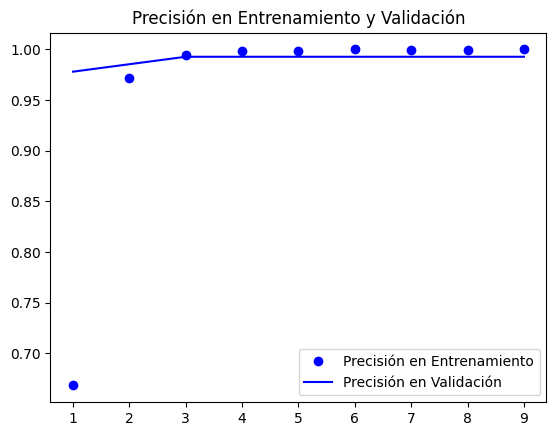

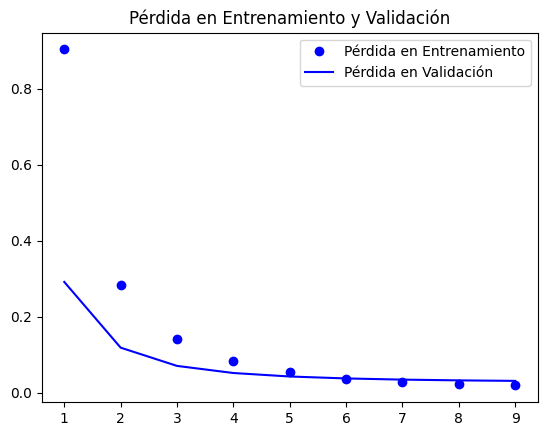

In [ ]:
graficar_curva_aprendizaje(history,plt=plt)

27/27 [==============================] - 2s 16ms/step


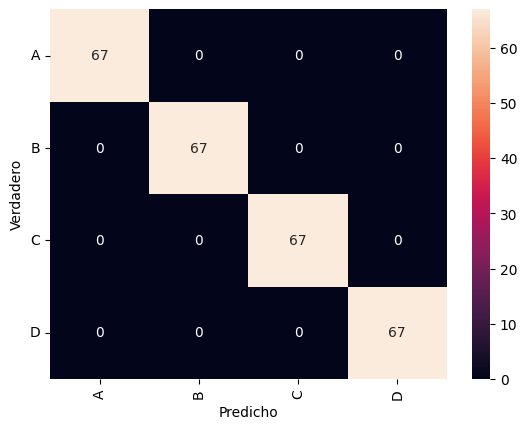

In [ ]:
actual, predicted = get_actual_predicted_labels(dataset=test_dataset,model=test_model_mobilenet)
graficar_matriz_confusion(actual, predicted, test_dataset.class_names)
#print(actual,predicted)

In [ ]:
precision, recall = calcular_precision_recall(actual, predicted, test_dataset.class_names)
resultadosf1=calcular_f1_score(precision, recall)
print("Resultado Precisión: {}".format(precision))
print("Resultado Recall: {}".format( recall))
print("Resultado F1_Score: {}".format(resultadosf1))

Resultado F1_Score: {'angular_leafspot': 1.0, 'hojas_sanas': 1.0, 'leaf_spot': 1.0, 'powdery_mildew': 1.0}


In [ ]:
valores = list(resultadosf1.values())
promedio = statistics.mean(valores)
print("Promedio:", promedio)

Promedio: 1.0
